# Dependencies and consts

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

%matplotlib inline

In [2]:
sns.set(style="whitegrid")

In [3]:
versions_names = ["classic", "marriage-max", "marriage-min", "marriage-mean"]

# Preprocessing functions

In [4]:
def trials_vs_function(tests_names):
    # We can run many tests, and want to join results.
    # Eg we can run functions 0-14 25 time each, and the others only 3 times each
    # becouse of running time.
    filescounts = pd.DataFrame(np.zeros((len(functions_numbers),
                                         len(versions_names)), 
                                         dtype = int),
                              columns = versions_names,
                              index = functions_numbers)
    for test_name in tests_names:
        for function_number in functions_numbers:
            for version_name in versions_names:
                # Assuming that if there are "scores" there is "history" as well
                file = "../{0}_benchmark_f{1}_{2}_scores.npy".format(
                                test_name, function_number, version_name)
                if(os.path.isfile(file)):
                    scores = np.load(file).tolist()
                    filescounts[version_name][function_number] += len(scores)
    return filescounts

In [5]:
def load_covergence_data(tests_names, function_number, version_name):
    def load_histories_to_df(histories):
        dataframes = []
        for hist_id, history in enumerate(histories):
            history_T = np.array(history).T
            dataframes.append(pd.DataFrame(columns = [hist_id], 
                         index=history_T[0],
                         data=history_T[1]))
        df = pd.concat(dataframes, axis=1)
        #fill NaNs with value before
        df.fillna(method='ffill',inplace=True)
        return df
    histories = []
    for test_name in tests_names:
        file = "../{0}_benchmark_f{1}_{2}_histories.npy".format(
                            test_name, function_number, version_name)
        if not os.path.isfile(file):
            print("Nie znaleziono pliku: {0}".format(file))
            continue
        histories += np.load(file).tolist()
    df = load_histories_to_df(histories)
    return df

In [6]:
def print_covergence_graphs(tests_names,agg_function=np.mean, 
                            y_scale = 'log', x_scale = 'log'):
    for function_number in functions_numbers:
        plt.figure()
        ax = plt.axes()
        ax.ticklabel_format(style='plain')
        ax.set_yscale(y_scale)
        ax.set_xscale(x_scale)
        #if(x_scale=='log'):
        #    ax.set_xlim(left=1.0)
        plt.title("Testy dla F{0}".format(function_number))
        for version_name in versions_names:
            df = load_covergence_data(tests_names, function_number, 
                                                    version_name)
            agg = df.apply(agg_function,axis=1)
            agg.plot(grid=True)
            #index = covergence_graph.index
            #vals = covergence_graph.values.T[0]
            #plt.plot(index, vals)
        plt.legend(versions_names)

In [7]:
def load_scores_data(tests_names, function_number, version_name):
    scores = []
    for test_name in tests_names:
        file = "../{0}_benchmark_f{1}_{2}_scores.npy".format(
                            test_name, function_number, version_name)
        if not os.path.isfile(file):
            print("Nie znaleziono pliku: {0}".format(file))
            continue
        scores += np.load(file).tolist()
    return scores

In [8]:
def comp_tables(tests_names, agg_function=np.mean):
    data = []
    for function_number in functions_numbers:
        row = []
        for version_name in versions_names:
            agg = agg_function(load_scores_data(tests_names, function_number, version_name))
            row.append(agg)
        data.append(row)
    df = pd.DataFrame(index=functions_numbers, columns=versions_names, data=data)
    return df

In [9]:
def compare_by_rank(tests_names, agg_function=np.mean):
    comp_df = comp_tables(tests_names, agg_function)
    ranked_df = comp_df.rank(axis=1)
    means = ranked_df.mean(axis=0)
    means.name = "means"
    ranked_df = ranked_df.append(means)
    return ranked_df

In [10]:
def print_boxplots(tests_names, versions_to_drop = None):
    for function_number in functions_numbers:
        plt.figure()
        ax = plt.axes()
        plt.title("Testy dla F{0}".format(function_number))
        
        ver_to_scores = dict()
        for version_name in versions_names:
            ver_to_scores[version_name] = load_scores_data(tests_names, function_number, 
                                                    version_name)
        df = pd.DataFrame(ver_to_scores)
        if versions_to_drop:
            df = df.drop(versions_to_drop, axis=1)
        sns.boxplot(data = df)
        #df.boxplot()

In [11]:
def load_best_solutions_data(tests_names, function_number, version_name):
    best_solutions = []
    for test_name in tests_names:
        file = "../{0}_benchmark_f{1}_{2}_best_solutions.npy".format(
                            test_name, function_number, version_name)
        if not os.path.isfile(file):
            print("Nie znaleziono pliku: {0}".format(file))
            continue
        best_solutions += np.load(file).tolist()
    return best_solutions

In [12]:
# If optimas are given as parameters values

# optimas = {1:-450, 
#            2:-450,
#            3:-450,
#            4:-450,
#            5:-310,
#            6: 390,
#            7:-180,
#            8:-140,
#            9:-330,
#           10:-330,
#           11: 90,
#           12:-460,
#           13:-130,
#           14:-300,
#           15: 120,
#           16: 120,
#           17: 120,
#           18: 10,
#           19: 10,
#           20: 10,
#           21: 360,
#           22: 360,
#           23: 360,
#           24: 260,
#           25: 260}
# threshes = {1:1*10**(-6),
#            2:1*10**(-6),
#            3:1*10**(-6),
#            4:1*10**(-6),
#            5:1*10**(-6),
#            6:1*10**(-2),
#            7:1*10**(-2),
#            8:1*10**(-2),
#            9:1*10**(-2),
#            10:1*10**(-2),
#            11:1*10**(-2),
#            12:1*10**(-2),
#            13:1*10**(-2),
#            14:1*10**(-2),
#            15:1*10**(-2),
#            16:1*10**(-2),
#            17:1*10**(-1),
#            18:1*10**(-1),
#            19:1*10**(-1),
#            20:1*10**(-1),
#            21:1*10**(-1),
#            22:1*10**(-1),
#            23:1*10**(-1),
#            24:1*10**(-1),
#            25:1*10**(-1)}

# def optimum_found_counts(tests_names):
#     # How many times optimal solutions was found (counted for each dimension)
#     data = []
#     for function_number in functions_numbers:
#         row = []
#         for version_name in versions_names:
#             sols = np.array(load_best_solutions_data(
#                 tests_names, function_number, version_name))
#             diffs = np.abs(sols-optimas[function_number])
#             found = (diffs<=threshes[function_number])
#             if(version_name!="classic"):
#                 # If it is pair wersion we get pairs of vectors instead of standalone vectors
#                 # Choose only the better vec
#                 betters = (found.sum(axis=2).argmax(axis=1))
#                 betters_found = []
#                 for i,pair in enumerate(found):
#                     betters_found.append(pair[betters[i]])
#                 betters_found = np.array(betters_found)
#                 found = betters_found
#             total_found = found.sum()
#             #total_trials = founds.size
#             row.append(total_found)
#         data.append(row)
#     df = pd.DataFrame(index=functions_numbers, columns=versions_names, data=data)
#     return df

In [13]:
#from cec2005real.cec2005 import Function
#
# in https://github.com/dmolina/cec2005real it is said that the best is always = 0

optimas = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,
           12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,
           22:0,23:0,24:0,25:0}

threshes = {1:1*10**(-6),
           2:1*10**(-6),
           3:1*10**(-6),
           4:1*10**(-6),
           5:1*10**(-6),
           6:1*10**(-2),
           7:1*10**(-2),
           8:1*10**(-2),
           9:1*10**(-2),
           10:1*10**(-2),
           11:1*10**(-2),
           12:1*10**(-2),
           13:1*10**(-2),
           14:1*10**(-2),
           15:1*10**(-2),
           16:1*10**(-2),
           17:1*10**(-1),
           18:1*10**(-1),
           19:1*10**(-1),
           20:1*10**(-1),
           21:1*10**(-1),
           22:1*10**(-1),
           23:1*10**(-1),
           24:1*10**(-1),
           25:1*10**(-1)}

def optimum_found_counts(tests_names):
    # How many times optimal solutions was found (counted for each dimension)
    data = []
    for function_number in functions_numbers:
        row = []
        for version_name in versions_names:
            sols = np.array(load_scores_data(
                tests_names, function_number, version_name))
            diffs = np.abs(sols-optimas[function_number])
            found = (diffs<=threshes[function_number])
            total_found = found.sum()
            #total_trials = founds.size
            row.append(total_found)
        data.append(row)
    df = pd.DataFrame(index=functions_numbers, columns=versions_names, data=data)
    return df

# Results from Test0

- 3 repeats for each function
- tested functions: 1-12

In [27]:
functions_numbers = list(range(1,20+1))

In [28]:
tests_names = ["Test0"]

In [57]:
trials_vs_function(tests_names)

,classic,marriage-max,marriage-min,marriage-mean
1,3,3,3,3
2,3,3,3,3
3,3,3,3,3
4,3,3,3,3
5,3,3,3,3
6,3,3,3,3
7,3,3,3,3
8,3,3,3,3
9,3,3,3,3
10,3,3,3,3


In [30]:
optimum_found_counts(tests_names)

,classic,marriage-max,marriage-min,marriage-mean
1,0,0,3,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0
10,0,0,0,0


In [15]:
comp_tables(tests_names, np.mean)

,classic,marriage-max,marriage-min,marriage-mean
1,0.006422,0.000225,7.320824e-08,0.000053
2,0.022434,0.005337,1.109434e-04,0.003213
3,35705.320193,26340.063870,8.087617e+03,12781.285836
4,11534.454326,2755.960853,4.724228e-04,0.006171
5,8.952324,0.832189,1.572100e-01,0.518720
6,7.669899,7.715719,5.299923e+00,7.949823
7,0.079501,14.973255,2.216256e+01,19.062802
8,20.201235,20.746726,2.009393e+01,20.653838
9,40.133357,37.808344,2.852210e+01,37.476666
10,99.832673,73.958417,5.206921e+01,77.606226


In [16]:
comp_tables(tests_names, np.min)

,classic,marriage-max,marriage-min,marriage-mean
1,0.006340,0.000081,7.096481e-09,0.000043
2,0.013284,0.004969,5.201818e-05,0.000642
3,4527.233609,19387.843967,3.681079e+03,6895.401134
4,7442.157549,1911.808257,3.493608e-04,0.002348
5,8.361742,0.431548,9.396481e-03,0.462831
6,7.562049,7.671317,4.967533e+00,7.066841
7,0.069975,6.543338,1.271171e+01,13.750687
8,20.172585,20.708510,2.006143e+01,20.614979
9,24.877744,17.909297,1.989914e+01,15.919378
10,81.592593,66.661947,2.885374e+01,36.813451


In [17]:
comp_tables(tests_names, np.max)

,classic,marriage-max,marriage-min,marriage-mean
1,0.006543,0.000421,1.933401e-07,0.000059
2,0.032444,0.005876,2.137287e-04,0.005010
3,77441.783263,37423.873314,1.158157e+04,19448.895383
4,17621.711632,3806.232965,6.941302e-04,0.009926
5,9.706006,1.033637,3.997552e-01,0.607245
6,7.840345,7.753169,5.683273e+00,9.578533
7,0.087294,26.211924,3.549104e+01,28.962043
8,20.221237,20.784447,2.013468e+01,20.697693
9,48.755308,51.737708,3.979828e+01,56.712323
10,112.434405,82.581351,7.860106e+01,127.353253


In [18]:
compare_by_rank(tests_names, np.mean)

,classic,marriage-max,marriage-min,marriage-mean
1,4.0,3.00,1.0,2.00
2,4.0,3.00,1.0,2.00
3,4.0,3.00,1.0,2.00
4,4.0,3.00,1.0,2.00
5,4.0,3.00,1.0,2.00
6,2.0,3.00,1.0,4.00
7,1.0,2.00,4.0,3.00
8,2.0,4.00,1.0,3.00
9,4.0,3.00,1.0,2.00
10,4.0,2.00,1.0,3.00


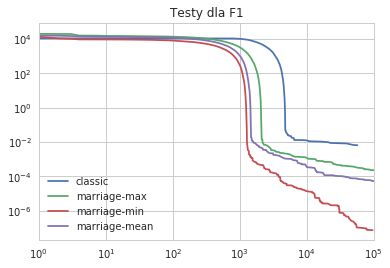

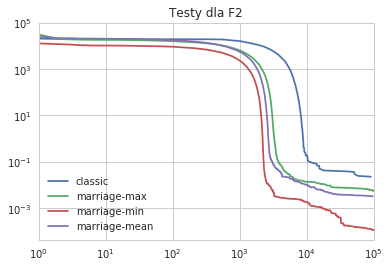

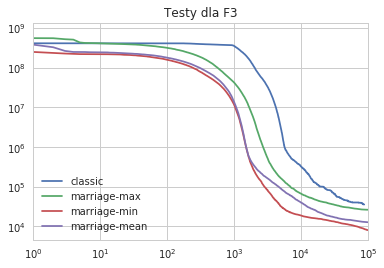

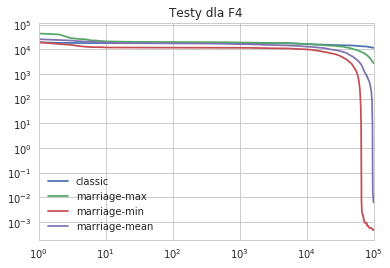

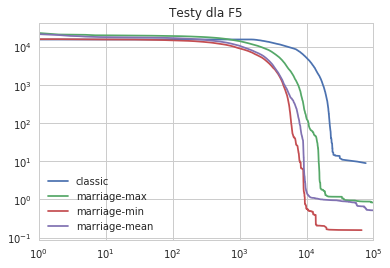

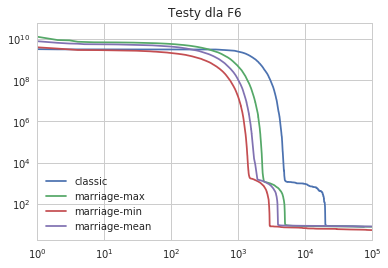

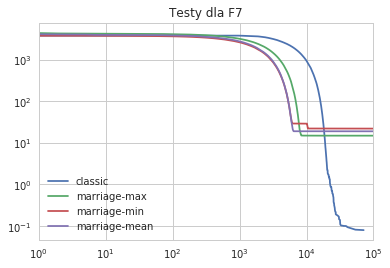

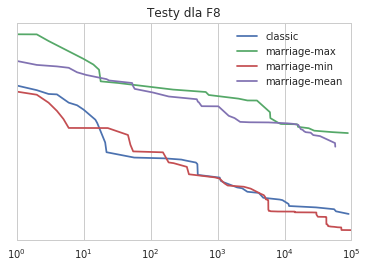

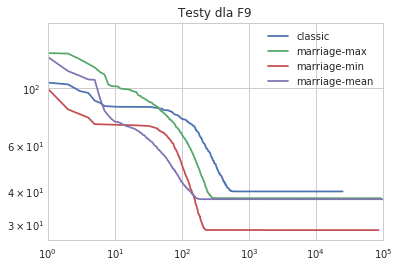

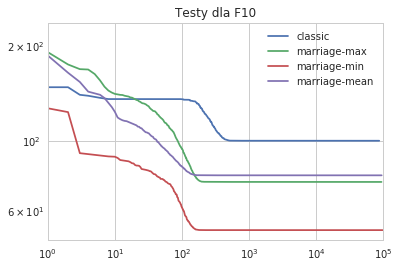

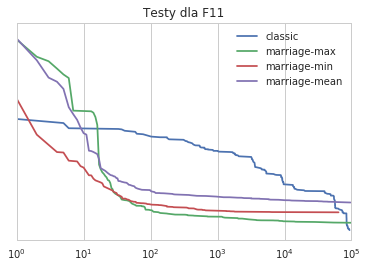

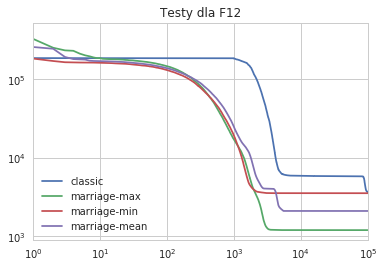

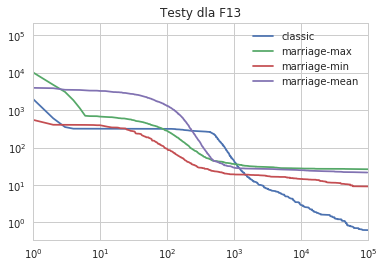

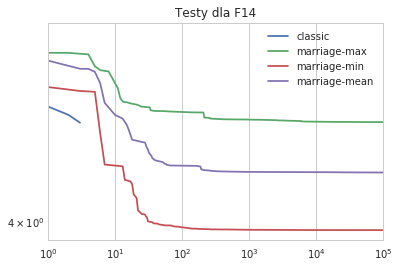

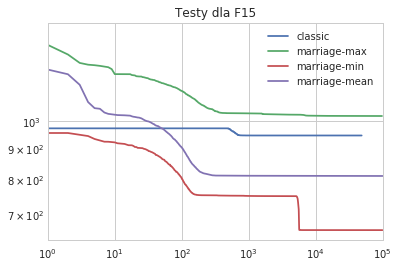

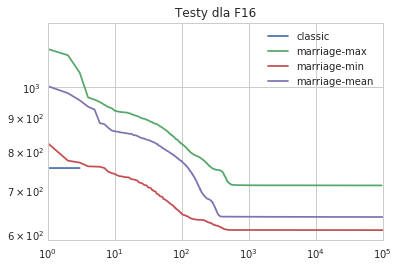

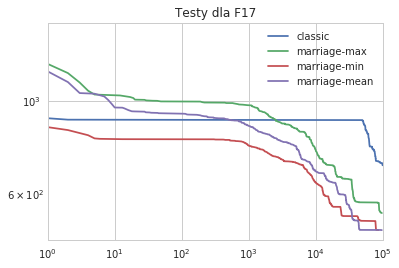

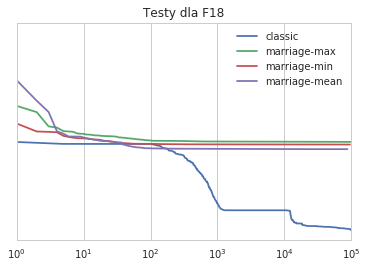

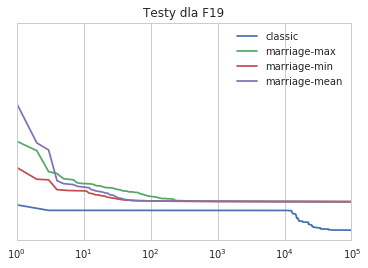

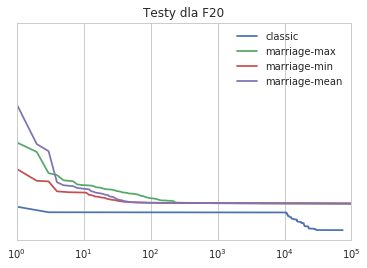

In [19]:
print_covergence_graphs(tests_names, np.mean)

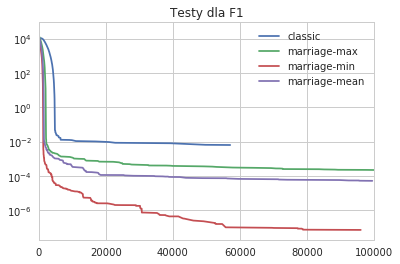

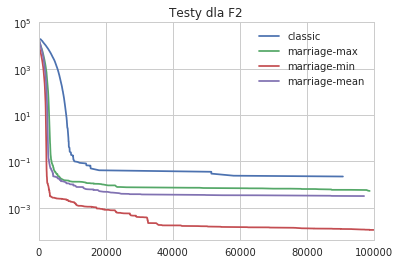

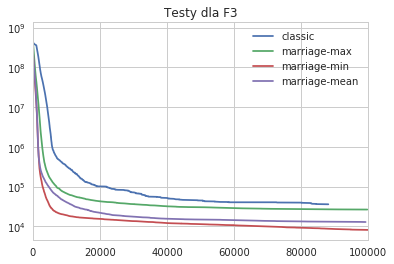

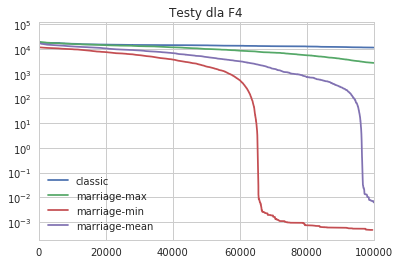

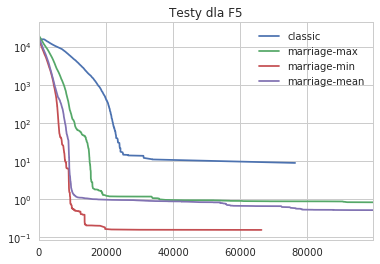

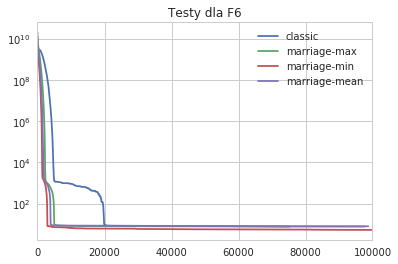

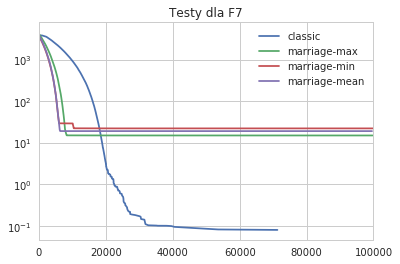

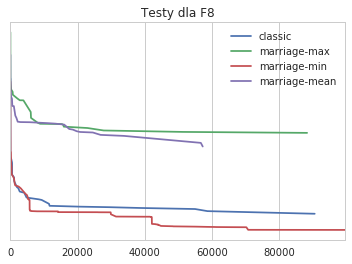

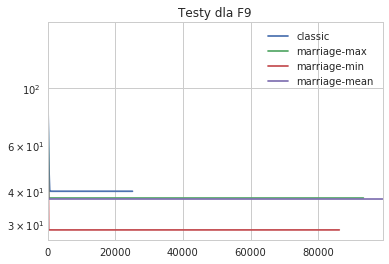

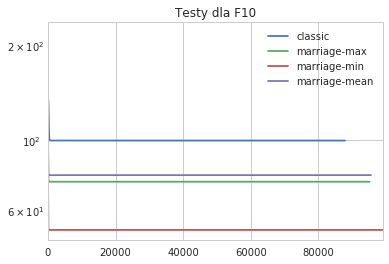

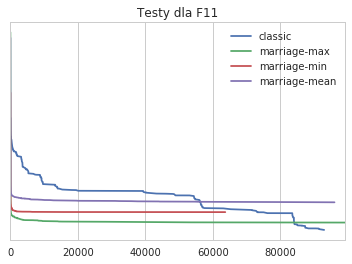

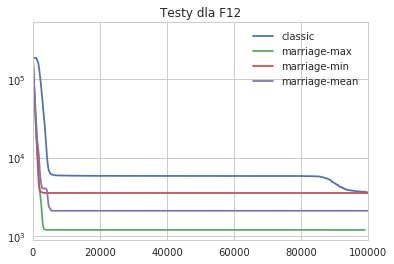

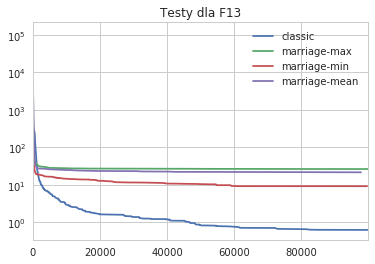

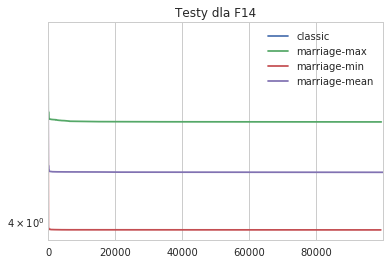

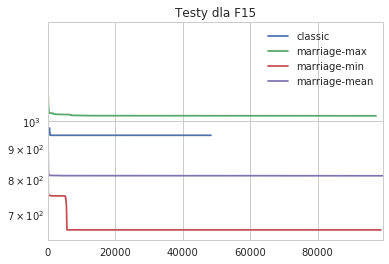

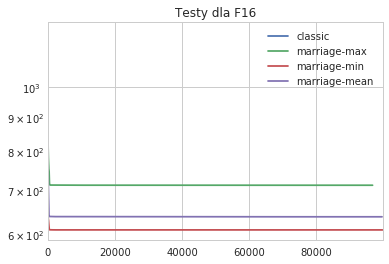

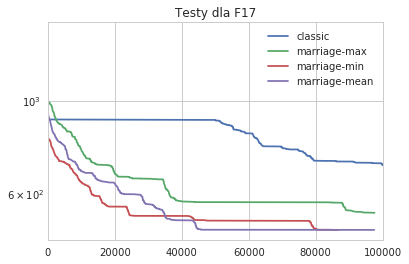

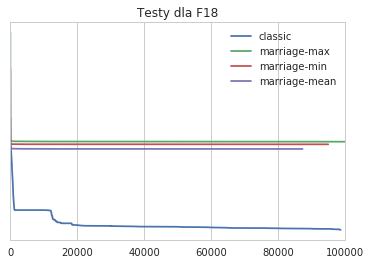

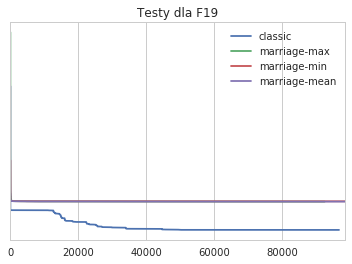

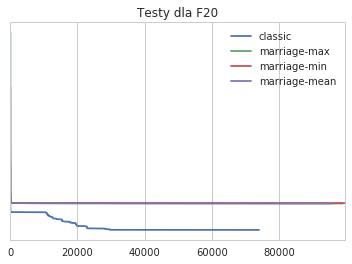

In [20]:
print_covergence_graphs(tests_names, np.mean, x_scale='linear')

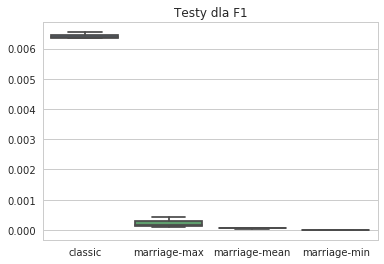

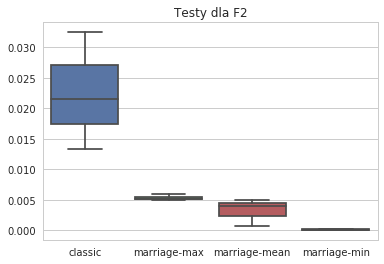

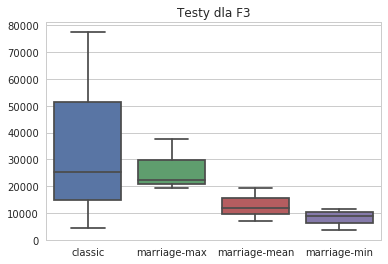

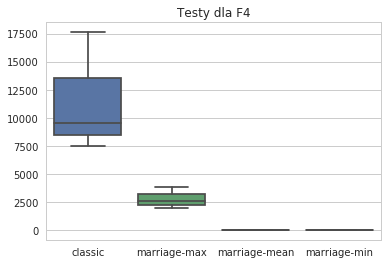

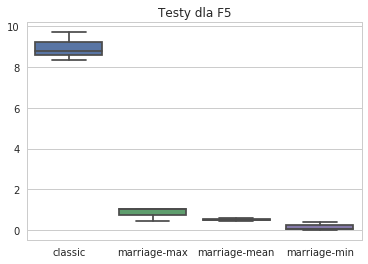

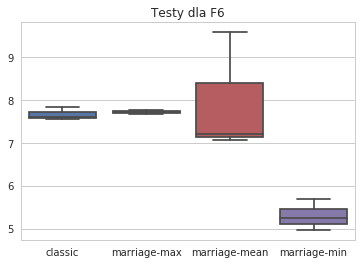

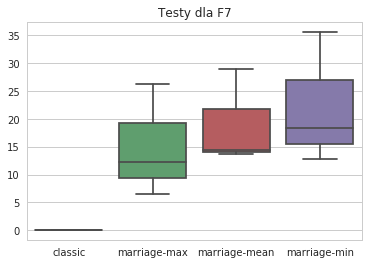

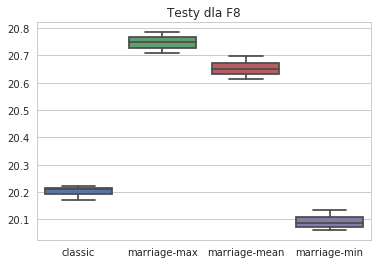

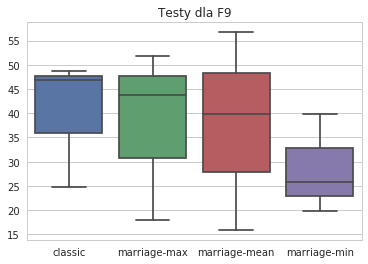

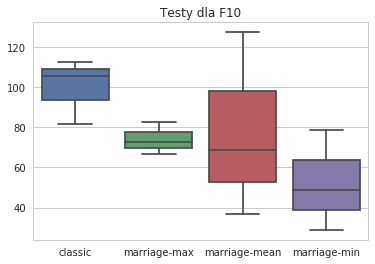

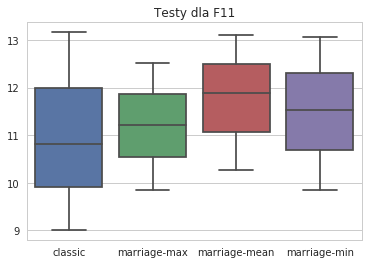

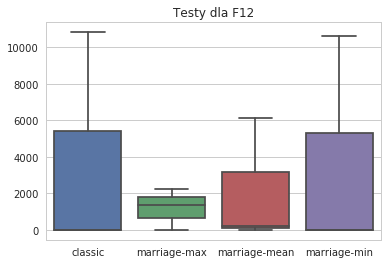

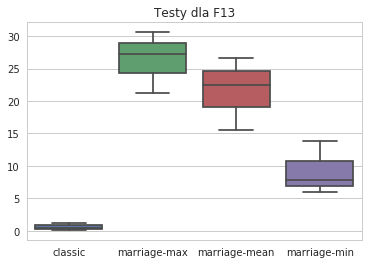

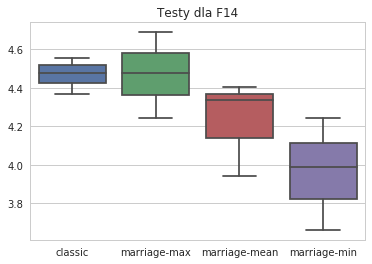

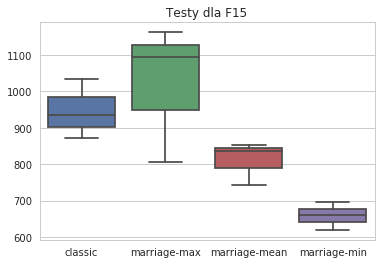

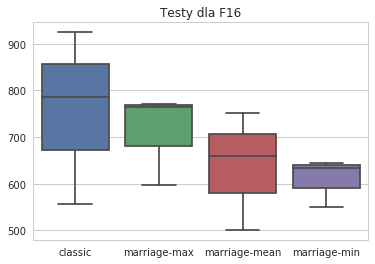

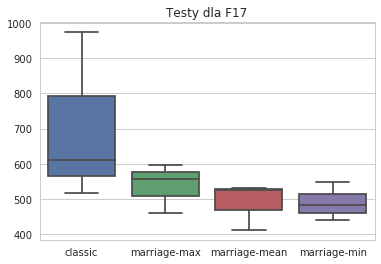

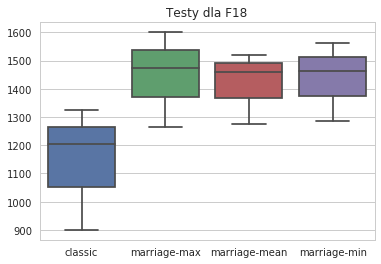

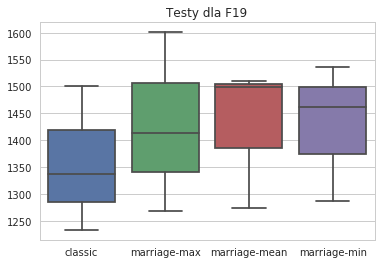

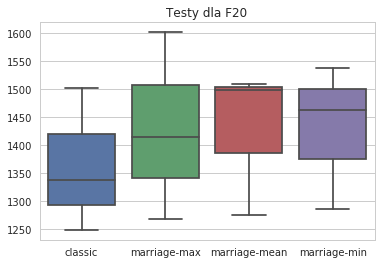

In [21]:
print_boxplots(tests_names)

# Results from Test1 [and Test0]

- 6 repeats for each function
- tested functions: 1,4,6,9,12,13,14
  - 1,4 - unimodals
  - 6,9 - Multi Modal Signle Function
  - 13,14 - Expanded Function
- more: http://web.mysites.ntu.edu.sg/epnsugan/PublicSite/Shared%20Documents/CEC2005/Tech-Report-May-30-05.pdf

In [21]:
functions_numbers = [1,4,6,9,12,13,14]

In [22]:
tests_names = ["Test1", "Test0"]

In [23]:
optimum_found_counts(tests_names)

,classic,marriage-max,marriage-min,marriage-mean
1,0,0,9,0
4,0,0,0,0
6,0,0,0,0
9,0,0,0,0
12,0,0,1,0
13,0,0,0,0
14,0,0,0,0


In [24]:
trials_vs_function(tests_names)

,classic,marriage-max,marriage-min,marriage-mean
1,9,9,9,9
4,9,9,9,9
6,9,9,9,9
9,9,9,9,9
12,9,9,9,9
13,9,9,9,9
14,9,9,9,9


In [25]:
comp_tables(tests_names, np.mean)

,classic,marriage-max,marriage-min,marriage-mean
1,0.006598,0.000167,1.150247e-07,0.000068
4,13513.319419,6457.933589,1.156584e+03,1554.585057
6,7.711672,7.671232,6.288853e+00,7.426572
9,50.303964,46.320725,3.537622e+01,37.697806
12,1212.247253,407.917386,1.860332e+03,1889.747564
13,1.106445,25.523937,9.786444e+00,20.276348
14,4.541704,4.567016,4.155874e+00,4.260429


In [26]:
comp_tables(tests_names, np.min)

,classic,marriage-max,marriage-min,marriage-mean
1,0.003378,0.000048,7.096481e-09,0.000043
4,7442.157549,1702.133366,3.358231e-04,0.002348
6,7.160798,7.496405,4.967533e+00,6.935187
9,24.877744,17.909297,1.989914e+01,15.919378
12,10.091589,0.495851,9.987567e-03,0.586284
13,0.140158,12.614385,5.907738e+00,8.645524
14,4.368699,4.205333,3.660114e+00,3.554157


In [27]:
comp_tables(tests_names, np.max)

,classic,marriage-max,marriage-min,marriage-mean
1,0.009185,0.000421,4.479514e-07,0.000096
4,20608.411470,17066.318060,9.330082e+03,5609.350358
6,8.246749,7.836816,9.135215e+00,9.578533
9,69.649276,75.616255,6.168723e+01,57.707456
12,10819.669318,2245.263198,1.062276e+04,10622.876334
13,1.813068,48.923289,1.527642e+01,32.712561
14,4.754392,4.884208,4.499607e+00,4.499304


In [28]:
compare_by_rank(tests_names, np.mean)

,classic,marriage-max,marriage-min,marriage-mean
1,4.000000,3.0,1.000000,2.000000
4,4.000000,3.0,1.000000,2.000000
6,4.000000,3.0,1.000000,2.000000
9,4.000000,3.0,1.000000,2.000000
12,2.000000,1.0,3.000000,4.000000
13,1.000000,4.0,2.000000,3.000000
14,3.000000,4.0,1.000000,2.000000
means,3.142857,3.0,1.428571,2.428571


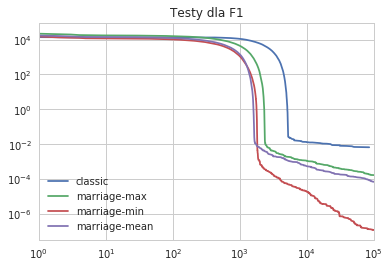

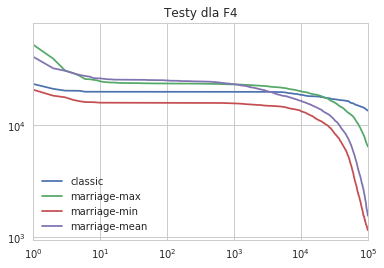

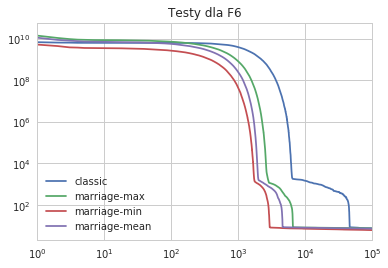

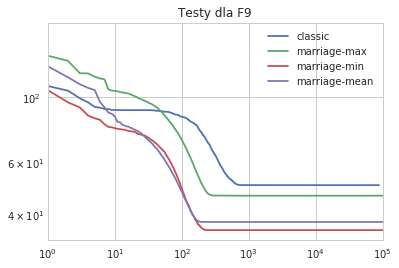

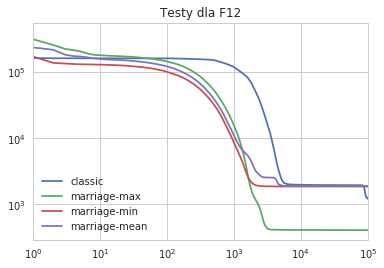

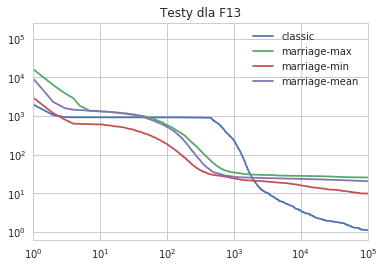

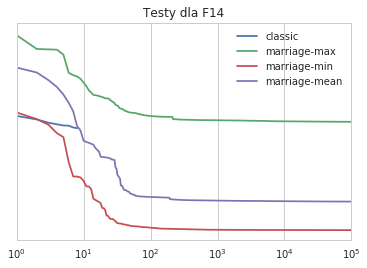

In [29]:
print_covergence_graphs(tests_names, np.mean) #np.median

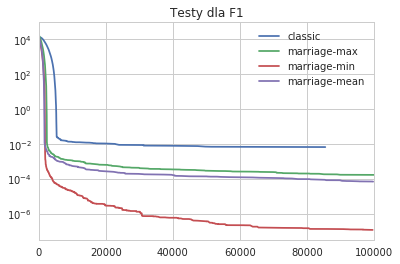

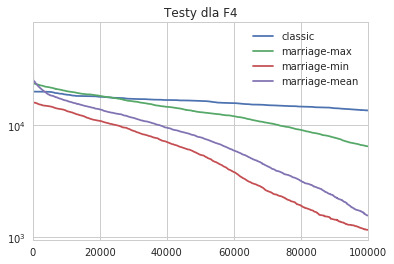

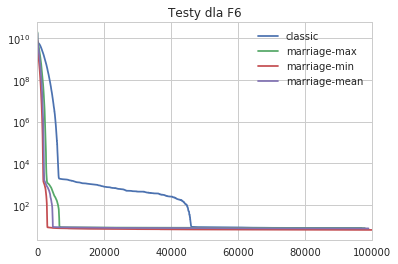

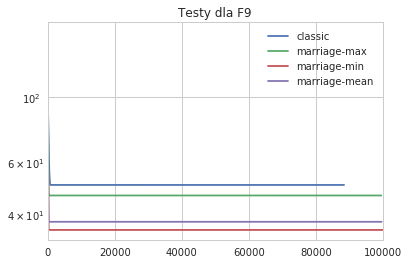

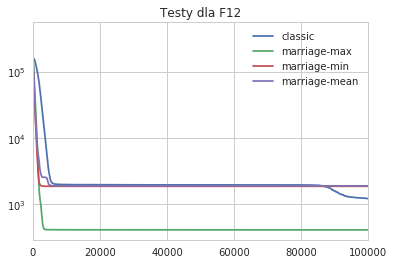

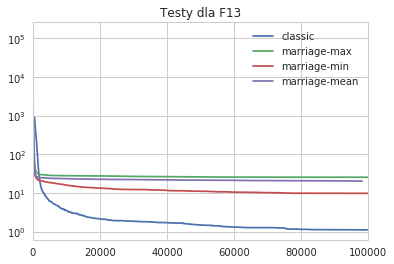

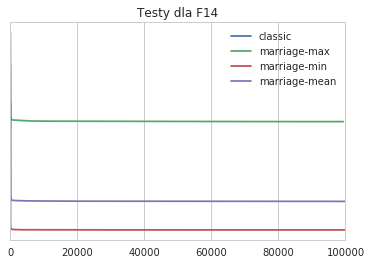

In [30]:
print_covergence_graphs(tests_names, np.mean, x_scale='linear') # np.median

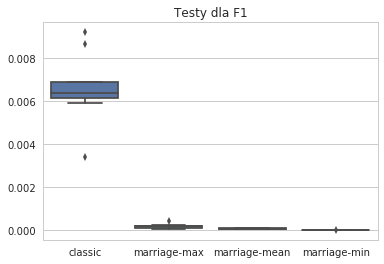

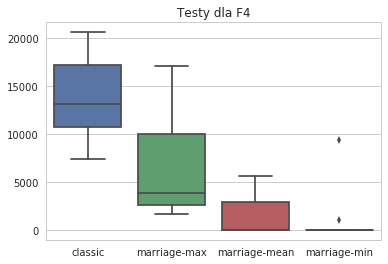

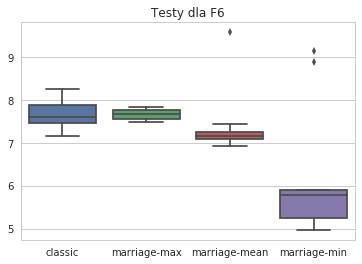

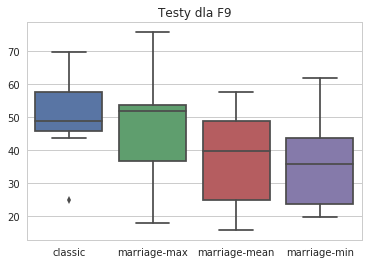

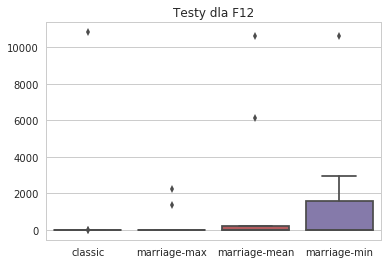

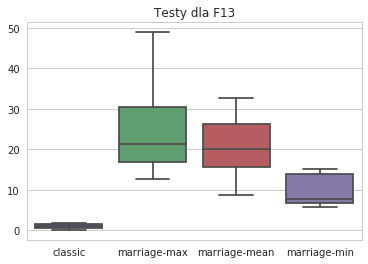

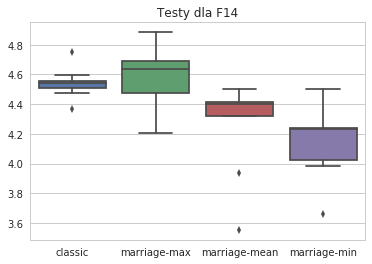

In [31]:
print_boxplots(tests_names)